# Canny Edge Detection

## Purpose
Test and validate Canny edge detection to extract precise lane line edges from color masks.

## Workflow
1. Import functions from `pipeline.py`
2. Load test frame and apply preprocessing (ROI + Color)
3. Apply Canny edge detection
4. Test on multiple frames

## Canny Parameters (from pipeline.py)
- **Low threshold = 50** - Weak edge threshold
- **High threshold = 150** - Strong edge threshold
- **Blur kernel = 5** - Gaussian blur to reduce noise

## 1. Import Libraries and Pipeline Functions

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys

# Add src directory to path
sys.path.insert(0, os.path.abspath('../src'))

# Import pipeline functions
from pipeline import apply_roi_mask, apply_color_threshold, apply_canny

print("✓ Libraries and pipeline functions imported")

✓ Libraries and pipeline functions imported


## 2. Load Test Frame and Apply Complete Pipeline

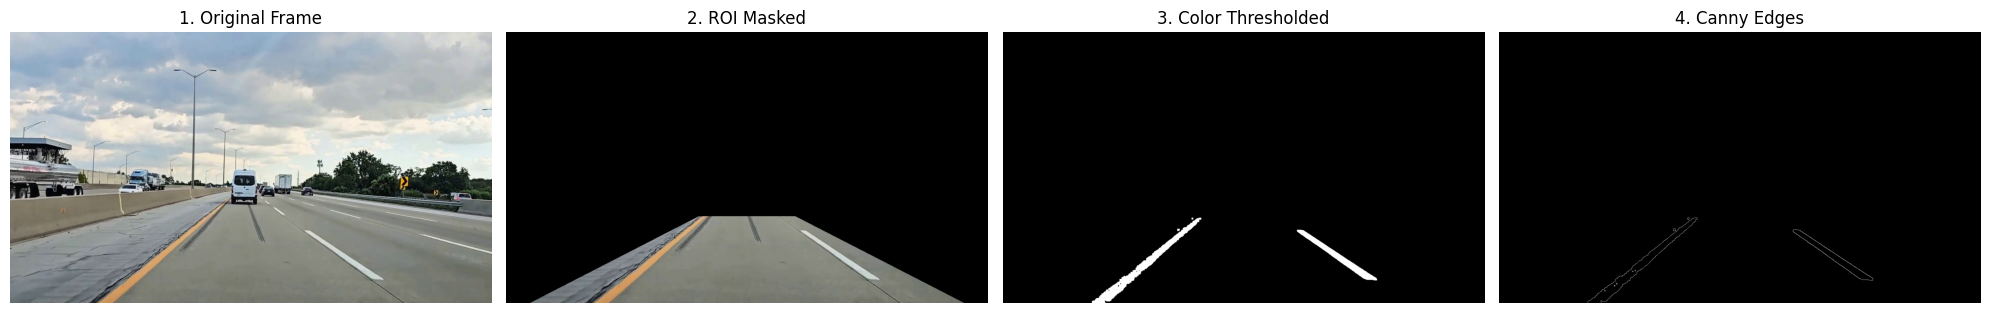

✓ Complete pipeline applied to frame_t109_f6540.png


In [2]:
# Load test frame
frames_dir = "../data/frames_sample"
test_frame = "frame_t109_f6540.png"

img = cv2.imread(os.path.join(frames_dir, test_frame))

# Apply complete preprocessing pipeline
img_roi, roi_pts = apply_roi_mask(img)
color_mask = apply_color_threshold(img_roi)
edges = apply_canny(color_mask)

# Visualize all pipeline stages
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('1. Original Frame')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB))
axes[1].set_title('2. ROI Masked')
axes[1].axis('off')

axes[2].imshow(color_mask, cmap='gray')
axes[2].set_title('3. Color Thresholded')
axes[2].axis('off')

axes[3].imshow(edges, cmap='gray')
axes[3].set_title('4. Canny Edges')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"✓ Complete pipeline applied to {test_frame}")

## 3. Compare Edge Detection Before and After

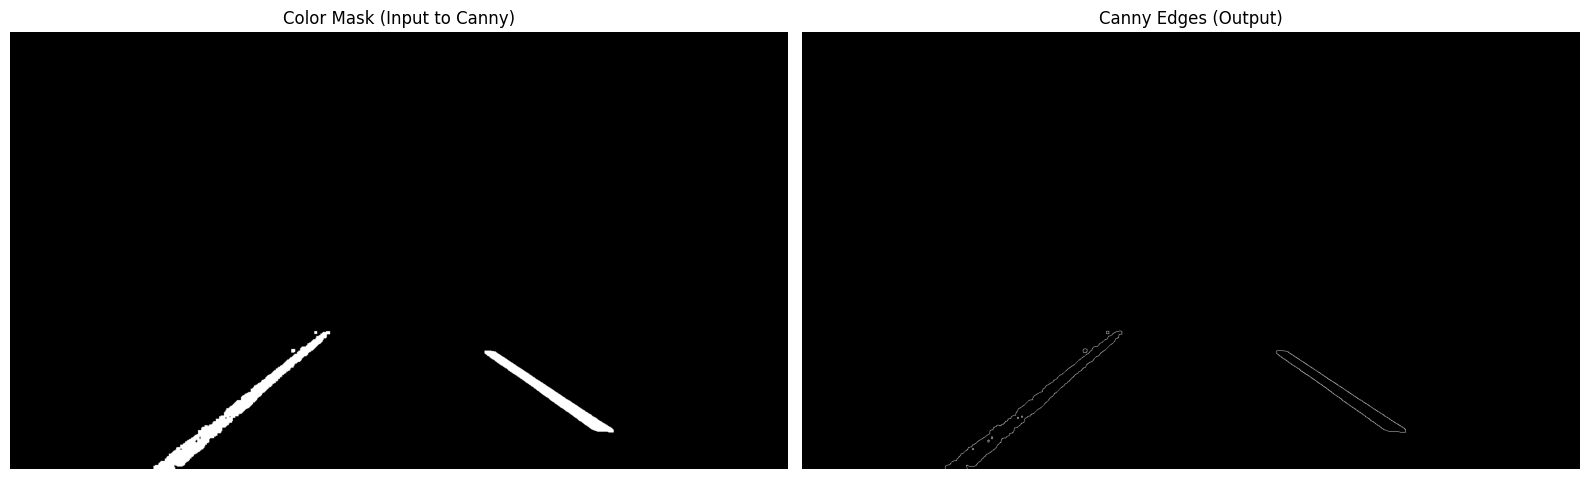

✓ Canny extracts precise edges from color mask


In [3]:
# Compare color mask vs edges
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(color_mask, cmap='gray')
axes[0].set_title('Color Mask (Input to Canny)')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edges (Output)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("✓ Canny extracts precise edges from color mask")

## 4. Test on Multiple Frames

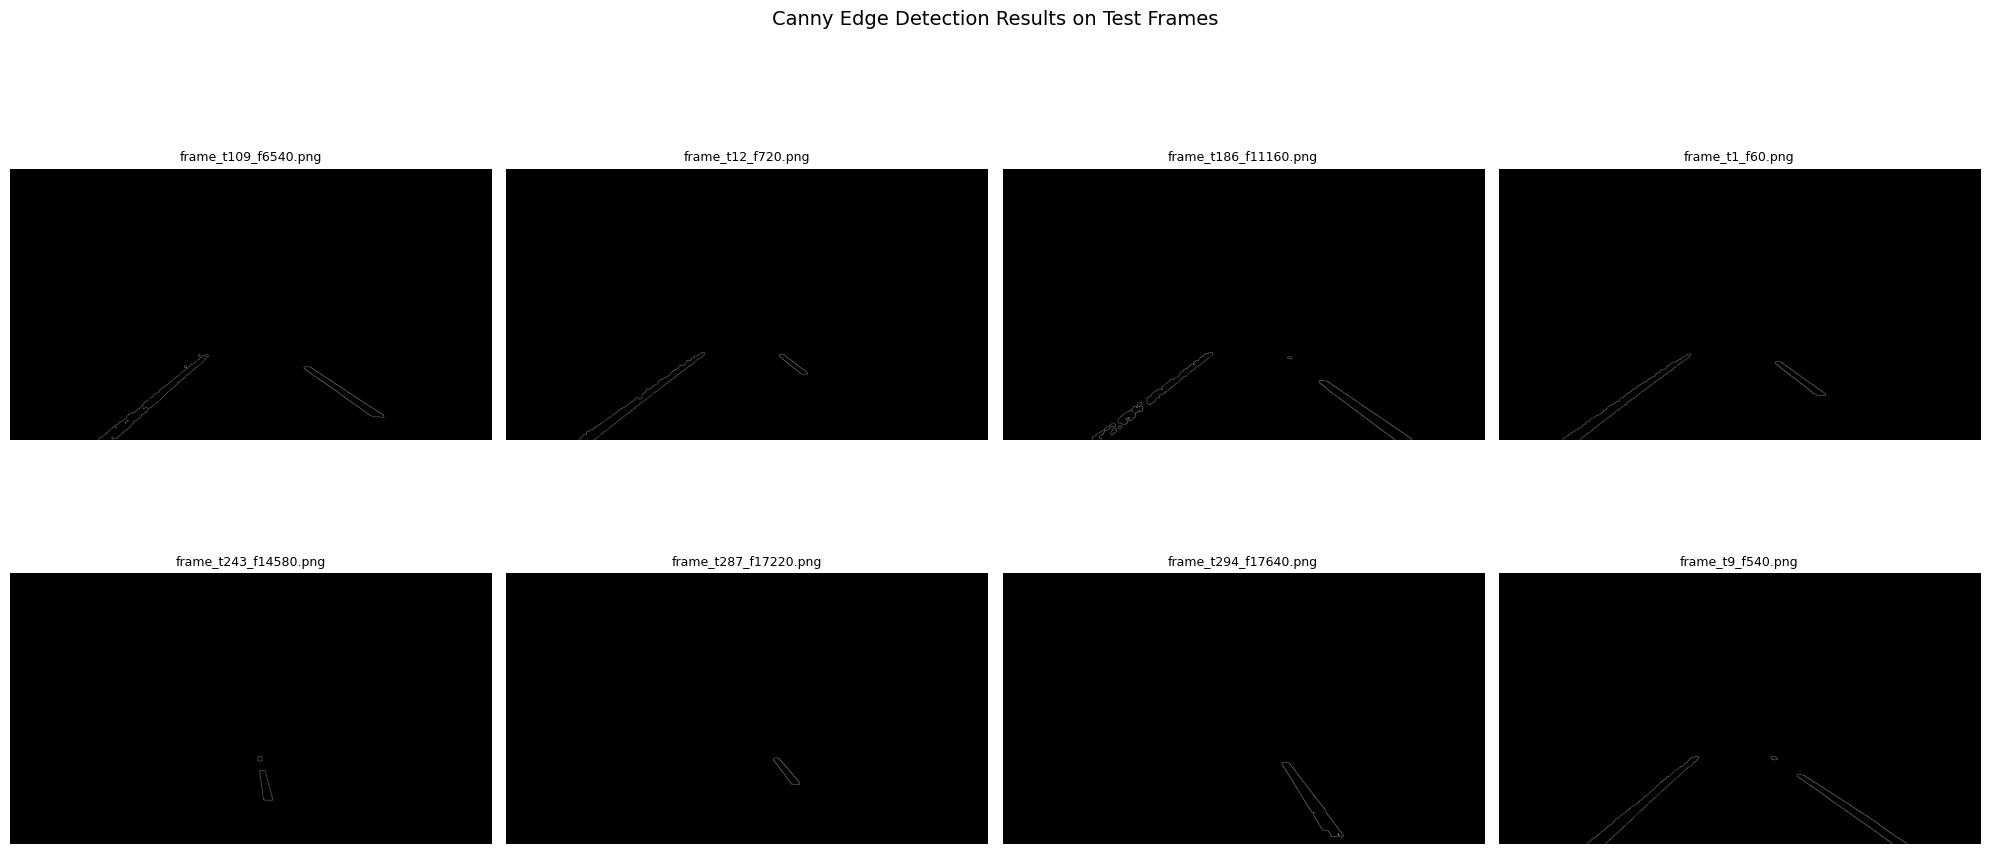

✓ Canny edge detection tested on 8 frames


In [4]:
# Test frames with diverse conditions
test_frames = [
    "frame_t109_f6540.png",
    "frame_t12_f720.png",
    "frame_t186_f11160.png",
    "frame_t1_f60.png",
    "frame_t243_f14580.png",
    "frame_t287_f17220.png",
    "frame_t294_f17640.png",
    "frame_t9_f540.png"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, frame_name in enumerate(test_frames):
    img = cv2.imread(os.path.join(frames_dir, frame_name))
    
    # Apply complete pipeline
    img_roi, _ = apply_roi_mask(img)
    mask = apply_color_threshold(img_roi)
    edges = apply_canny(mask)
    
    axes[idx].imshow(edges, cmap='gray')
    axes[idx].set_title(frame_name, fontsize=9)
    axes[idx].axis('off')

plt.suptitle("Canny Edge Detection Results on Test Frames", fontsize=14)
plt.tight_layout()
plt.show()

print(f"✓ Canny edge detection tested on {len(test_frames)} frames")